In [82]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_data(num_surgeries, num_rooms, num_surgeons):

    surgeries = {
        "Surgery_ID": [f"S{i}" for i in range(1, num_surgeries + 1)],
        "Duration": [random.randint(30, 180) for _ in range(num_surgeries)],  
        "Priority": [random.choice(["Low", "Medium", "High"]) for _ in range(num_surgeries)], 
        "Post_Time": [],  
        "Recovery_Time": []
    }

  
    for priority in surgeries["Priority"]:
        if priority == "High":
            surgeries["Post_Time"].append(random.randint(30, 60))  
            surgeries["Recovery_Time"].append(random.randint(30, 120))  
        elif priority == "Medium":
            surgeries["Post_Time"].append(random.randint(15, 45))  
            surgeries["Recovery_Time"].append(random.randint(20, 80))  
        elif priority == "Low":
            surgeries["Post_Time"].append(random.randint(5, 15))  
            surgeries["Recovery_Time"].append(random.randint(5, 15))  

    df_surgeries = pd.DataFrame(surgeries)
    
    operating_rooms = {
        "Room_ID": [f"R{i}" for i in range(1, num_rooms + 1)],
        "Available_Time": [600 for _ in range(num_rooms)]
    }
    df_operating_rooms = pd.DataFrame(operating_rooms)

   
    surgeons = {
        "Surgeon_ID": [f"SG{i}" for i in range(1, num_surgeons + 1)],
        "Available_Time": [600 for _ in range(num_surgeons)]  
    }
    df_surgeons = pd.DataFrame(surgeons)

    return df_surgeries, df_operating_rooms, df_surgeons


df_surgeries, df_operating_rooms, df_surgeons = generate_data(num_surgeries=5, num_rooms=2, num_surgeons=3)


print("\nSurgeries DataFrame:\n", df_surgeries)
print("\nOperating Rooms DataFrame:\n", df_operating_rooms)
print("\nSurgeons DataFrame:\n", df_surgeons)


Surgeries DataFrame:
   Surgery_ID  Duration Priority  Post_Time  Recovery_Time
0         S1        68   Medium         24             72
1         S2       149   Medium         21             43
2         S3       106   Medium         25             64
3         S4       140      Low          8              9
4         S5       129   Medium         22             48

Operating Rooms DataFrame:
   Room_ID  Available_Time
0      R1             600
1      R2             600

Surgeons DataFrame:
   Surgeon_ID  Available_Time
0        SG1             600
1        SG2             600
2        SG3             600


In [83]:
NUM_ANTS = 10
NUM_ITERATIONS = 100
PHEROMONE_DECAY = 0.1
ALPHA = 1  # Pheromone influence
BETA = 2   # Heuristic influence

In [84]:
def initialize_pheromones(num_surgeries, num_assignments):
    pheromones = np.ones((num_surgeries, num_assignments))
    print("\nInitialized Pheromone Matrix:")
    print(pd.DataFrame(pheromones)) 
    return pheromones


#row is number of surgeries and number of assighments is all possible room-surgeon combinations
#number of assignments is calculated number of rooms * number of surgeons. 

In [85]:
# Initialize heuristic matrix based on surgery priorities and durations
def initialize_heuristics(df_surgeries, num_assignments):
    priority_weight = {"High": 7, "Medium": 4, "Low": 2}
    surgery_heuristics = np.array([
        priority_weight[row["Priority"]] / row["Duration"]
        for _, row in df_surgeries.iterrows()
    ])
    heuristics_matrix = np.tile(surgery_heuristics, (num_assignments, 1)).T

    print("\nHeuristic Values for Surgeries:")
    for surgery, heuristic in zip(df_surgeries["Surgery_ID"], surgery_heuristics):
        print(f"Surgery {surgery}: {heuristic:.4f}")

    print("\nHeuristics Matrix:")
    print(pd.DataFrame(heuristics_matrix))  # Display as a table

    return heuristics_matrix


example. Heuristic per surgery:
Heuristic Value
=
Priority Weight
Duration
Heuristic Value= 
Duration
Priority Weight
​
 
Example:
Priority = "High" (weight = 3).
Duration = 60 minutes.

Heuristic Value= 
3 / 60
 =0.05
 
 creating a matrix of just heuristic on rooms and surgeon
 

In [86]:
def visualize_pheromones(pheromones):
    plt.figure(figsize=(10, 6))
    sns.heatmap(pheromones, annot=True, cmap="YlGnBu")
    plt.title("Pheromone Levels")
    plt.xlabel("Assignments")
    plt.ylabel("Surgeries")
    plt.show()


In [87]:
def visualize_heuristics(heuristics_matrix):
    plt.figure(figsize=(10, 6))
    sns.heatmap(heuristics_matrix, annot=True, cmap="YlOrRd")
    plt.title("Heuristics Matrix")
    plt.xlabel("Assignments")
    plt.ylabel("Surgeries")
    plt.show()


In [88]:
num_surgeries = 5
num_rooms = 2
num_surgeons = 3
num_assignments = num_rooms * num_surgeons


In [89]:
df_surgeries = pd.DataFrame({
    "Surgery_ID": [f"S{i}" for i in range(1, num_surgeries + 1)],
    "Duration": [30, 60, 90, 120, 150],
    "Priority": ["High", "Medium", "Low", "Medium", "High"]
})


Initialized Pheromone Matrix:
     0    1    2    3    4    5
0  1.0  1.0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0  1.0  1.0


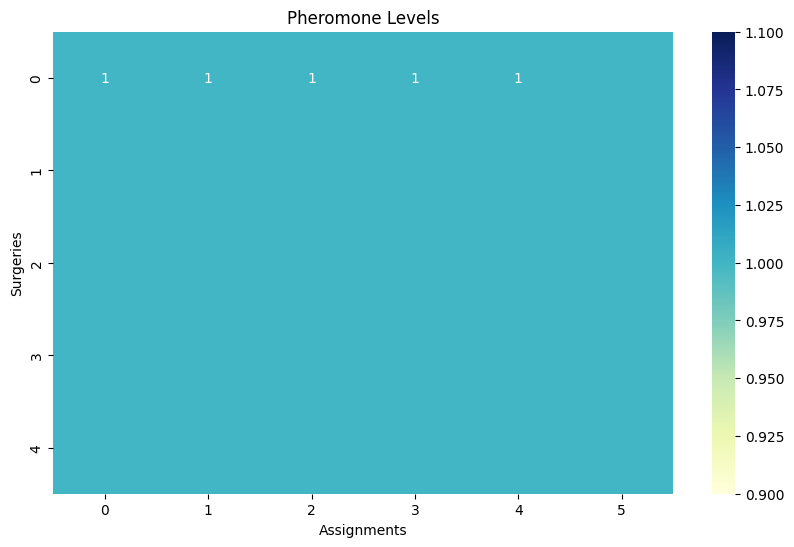


Heuristic Values for Surgeries:
Surgery S1: 0.2333
Surgery S2: 0.0667
Surgery S3: 0.0222
Surgery S4: 0.0333
Surgery S5: 0.0467

Heuristics Matrix:
          0         1         2         3         4         5
0  0.233333  0.233333  0.233333  0.233333  0.233333  0.233333
1  0.066667  0.066667  0.066667  0.066667  0.066667  0.066667
2  0.022222  0.022222  0.022222  0.022222  0.022222  0.022222
3  0.033333  0.033333  0.033333  0.033333  0.033333  0.033333
4  0.046667  0.046667  0.046667  0.046667  0.046667  0.046667


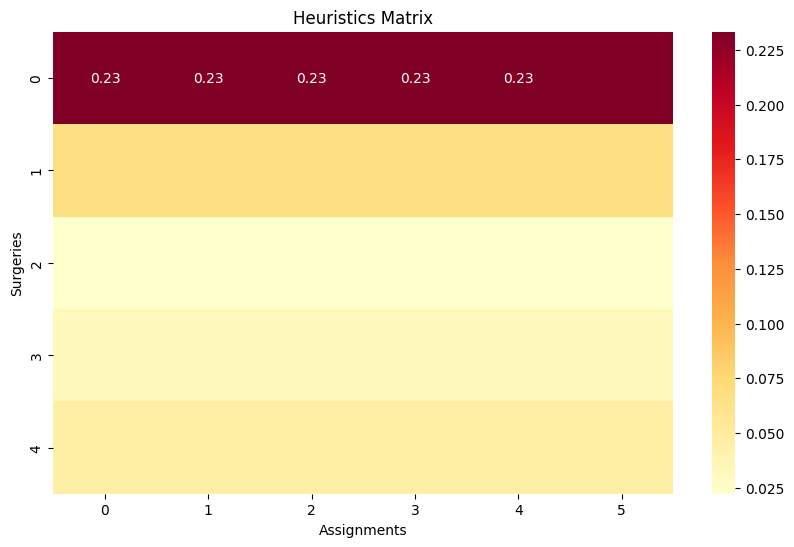

In [90]:
pheromones = initialize_pheromones(num_surgeries, num_assignments)
visualize_pheromones(pheromones)

heuristics = initialize_heuristics(df_surgeries, num_assignments)
visualize_heuristics(heuristics)


In [10]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Parameters
NUM_ANTS = 10
NUM_ITERATIONS = 10
PHEROMONE_DECAY = 0.1
ALPHA = 1  # Pheromone influence
BETA = 2   # Heuristic influence


def generate_data(num_surgeries, num_rooms, num_surgeons):
    surgeries = {
        "Surgery_ID": [f"S{i}" for i in range(1, num_surgeries + 1)],
        "Duration": [],
        "Priority": [random.choice(["Low", "Medium", "High"]) for _ in range(num_surgeries)], 
        "Post_Time": [],  
        "Recovery_Time": []
    }

    for priority in surgeries["Priority"]:
        
        if priority == "High":
            surgeries["Duration"].append(random.randint(60, 180))  
            surgeries["Post_Time"].append(random.randint(15, 30))
            surgeries["Recovery_Time"].append(random.randint(15, 30))
        elif priority == "Medium":
            surgeries["Duration"].append(random.randint(45, 120))  
            surgeries["Post_Time"].append(random.randint(10, 20))
            surgeries["Recovery_Time"].append(random.randint(10, 20))
        elif priority == "Low":
            surgeries["Duration"].append(random.randint(5, 30))  
            surgeries["Post_Time"].append(random.randint(5, 10))
            surgeries["Recovery_Time"].append(random.randint(5, 10))

    df_surgeries = pd.DataFrame(surgeries)
    
    operating_rooms = {
        "Room_ID": [f"R{i}" for i in range(1, num_rooms + 1)],
        "Available_Time": [600 for _ in range(num_rooms)]
    }
    df_operating_rooms = pd.DataFrame(operating_rooms)

    surgeons = {
        "Surgeon_ID": [f"SG{i}" for i in range(1, num_surgeons + 1)],
        "Available_Time": [600 for _ in range(num_surgeons)]  
    }
    df_surgeons = pd.DataFrame(surgeons)

    return df_surgeries, df_operating_rooms, df_surgeons

# Initialize pheromones
def initialize_pheromones(num_surgeries, num_assignments):
    return np.ones((num_surgeries, num_assignments))

# Initialize heuristics
def initialize_heuristics(df_surgeries, num_assignments):
    priority_weight = {"High": 7, "Medium": 4, "Low": 2}
    surgery_heuristics = np.array([
        priority_weight[row["Priority"]] / row["Duration"]
        for _, row in df_surgeries.iterrows()
    ])
    heuristics_matrix = np.tile(surgery_heuristics, (num_assignments, 1)).T
    return heuristics_matrix

def generate_emergency_surgery(surgery_id):
    return {
        "Surgery_ID": surgery_id,
        "Duration": random.randint(30, 120),  
        "Priority": "Emergency",
        "Post_Time": 0, 
        "Recovery_Time": random.randint(5, 10)  
    }

# Calculate probabilities
def calculate_probabilities(pheromones, heuristics_matrix, surgery_index, alpha, beta):
    pheromones_row = pheromones[surgery_index]
    heuristics_row = heuristics_matrix[surgery_index]
    combined = (pheromones_row ** alpha) * (heuristics_row ** beta)
    probabilities = combined / np.sum(combined)
    return probabilities

# Modified build_schedule to handle emergency surgeries
def build_schedule_with_emergencies(df_surgeries, df_operating_rooms, df_surgeons, pheromones, heuristics, emergency_surgeries):
    schedule = []
    available_rooms = {room: 600 for room in df_operating_rooms["Room_ID"]}
    available_surgeons = {surgeon: 600 for surgeon in df_surgeons["Surgeon_ID"]}

    # Add emergency surgeries first
    for emergency in emergency_surgeries:
        for room, surgeon in zip(available_rooms.keys(), available_surgeons.keys()):
            surgery_time = emergency["Duration"] + emergency["Post_Time"] + emergency["Recovery_Time"]
            if available_rooms[room] >= surgery_time and available_surgeons[surgeon] >= surgery_time:
                start_time = 600 - available_rooms[room]
                end_time = start_time + emergency["Duration"]
                schedule.append({
                    "Surgery_ID": emergency["Surgery_ID"],
                    "Assigned_Room": room,
                    "Assigned_Surgeon": surgeon,
                    "Start_Time": start_time,
                    "End_Time": end_time
                })
                available_rooms[room] -= surgery_time
                available_surgeons[surgeon] -= surgery_time
                break  # Move to the next emergency surgery

    # Schedule regular surgeries
    unscheduled_due_to_room = []
    unscheduled_due_to_surgeon = []
    for surgery_index, surgery in df_surgeries.iterrows():
        probabilities = calculate_probabilities(pheromones, heuristics, surgery_index, ALPHA, BETA)
        assignment_index = np.random.choice(len(probabilities), p=probabilities)
        room = df_operating_rooms.iloc[assignment_index % len(available_rooms)]["Room_ID"]
        surgeon = df_surgeons.iloc[assignment_index // len(available_rooms)]["Surgeon_ID"]
        surgery_time = surgery["Duration"] + surgery["Post_Time"] + surgery["Recovery_Time"]
        
        if available_rooms[room] >= surgery_time and available_surgeons[surgeon] >= surgery_time:
            start_time = 600 - available_rooms[room]
            end_time = start_time + surgery["Duration"]
            schedule.append({
                "Surgery_ID": surgery["Surgery_ID"],
                "Assigned_Room": room,
                "Assigned_Surgeon": surgeon,
                "Start_Time": start_time,
                "End_Time": end_time
            })
            available_rooms[room] -= surgery_time
            available_surgeons[surgeon] -= surgery_time
        else:
            if available_rooms[room] < surgery_time:
                unscheduled_due_to_room.append(surgery["Surgery_ID"])
            if available_surgeons[surgeon] < surgery_time:
                unscheduled_due_to_surgeon.append(surgery["Surgery_ID"])

    return schedule, available_rooms, available_surgeons, unscheduled_due_to_room, unscheduled_due_to_surgeon
# Evaluate fitness
def evaluate_fitness(schedule, df_surgeries, emergency_surgeries):
    fitness = 0
    max_fitness = 0

    # Calculate fitness for scheduled surgeries
    for assignment in schedule:
        surgery_id = assignment["Surgery_ID"]

        if surgery_id.startswith("E"):  # Emergency surgery
            contribution = 10  # Higher contribution for emergencies
        else:
            surgery_priority = df_surgeries.loc[df_surgeries["Surgery_ID"] == surgery_id, "Priority"].values[0]
            if surgery_priority == "High":
                contribution = 7
            elif surgery_priority == "Medium":
                contribution = 4
            elif surgery_priority == "Low":
                contribution = 2

        fitness += contribution

    # Calculate maximum possible fitness
    for _, row in df_surgeries.iterrows():
        if row["Priority"] == "High":
            max_fitness += 7
        elif row["Priority"] == "Medium":
            max_fitness += 4
        elif row["Priority"] == "Low":
            max_fitness += 2

    for emergency in emergency_surgeries:
        max_fitness += 10  # Maximum possible contribution for emergencies

    # Calculate penalty for unscheduled surgeries
    penalty = 0
    unscheduled_emergencies = [
        e for e in emergency_surgeries if e["Surgery_ID"] not in {assignment["Surgery_ID"] for assignment in schedule}
    ]
    for _ in unscheduled_emergencies:
        penalty += 4  # Lower penalty for unscheduled emergencies

    unscheduled_regulars = df_surgeries[~df_surgeries["Surgery_ID"].isin({assignment["Surgery_ID"] for assignment in schedule})]
    for _, row in unscheduled_regulars.iterrows():
        if row["Priority"] == "High":
            penalty += 5
        elif row["Priority"] == "Medium":
            penalty += 2
        elif row["Priority"] == "Low":
            penalty += 1

    # Subtract penalty from fitness
    fitness -= penalty

    # Calculate fitness percentage
    fitness_percentage = (fitness / max_fitness) * 100 if max_fitness > 0 else 0

    return fitness, fitness_percentage
# Update pheromones
def update_pheromones(pheromones, schedules, fitness_values, decay):
    for i in range(len(pheromones)):
        pheromones[i] *= (1 - decay)
        for j, schedule in enumerate(schedules):
            if i in schedule:
                pheromones[i] += fitness_values[j]
    return pheromones

def ant_colony_optimization_with_emergencies(df_surgeries, df_operating_rooms, df_surgeons):
    num_surgeries = len(df_surgeries)
    num_assignments = len(df_operating_rooms) * len(df_surgeons)
    pheromones = initialize_pheromones(num_surgeries, num_assignments)
    heuristics = initialize_heuristics(df_surgeries, num_assignments)
    best_schedule = None
    best_fitness = float("-inf")
    best_emergency_surgeries = None
    best_remaining_rooms = None
    best_remaining_surgeons = None
    best_unscheduled_due_to_room = None
    best_unscheduled_due_to_surgeon = None

    for iteration in range(NUM_ITERATIONS):
        #print(f"\n--- Iteration {iteration + 1} ---")  # Display iteration info
        schedules = []
        fitness_values = []

        # Always generate 2-3 emergencies for fairness
        num_emergencies = random.randint(2, 3)
        emergency_surgeries = [
            generate_emergency_surgery(f"E{iteration}_{i}")
            for i in range(num_emergencies)
        ]

        for ant in range(NUM_ANTS):
            schedule, available_rooms, available_surgeons, unscheduled_due_to_room, unscheduled_due_to_surgeon = build_schedule_with_emergencies(
                df_surgeries, df_operating_rooms, df_surgeons,
                pheromones, heuristics, emergency_surgeries
            )
            fitness, _ = evaluate_fitness(schedule, df_surgeries, emergency_surgeries)
            schedules.append(schedule)
            fitness_values.append(fitness)

            # Print only the fitness score for each ant
            #print(f"Ant {ant + 1}: Fitness = {fitness}")

            if fitness > best_fitness:
                best_schedule = schedule
                best_fitness = fitness
                best_emergency_surgeries = emergency_surgeries
                best_remaining_rooms = available_rooms
                best_remaining_surgeons = available_surgeons
                best_unscheduled_due_to_room = unscheduled_due_to_room
                best_unscheduled_due_to_surgeon = unscheduled_due_to_surgeon

        pheromones = update_pheromones(pheromones, schedules, fitness_values, PHEROMONE_DECAY)

    print("\nBest Unscheduled Due to Room Time:", best_unscheduled_due_to_room)
    print("Best Unscheduled Due to Surgeon Time:", best_unscheduled_due_to_surgeon)

    return best_schedule, best_fitness, best_emergency_surgeries, best_remaining_rooms, best_remaining_surgeons
# Display the detailed schedule
def display_emergency_schedule(best_schedule, emergency_surgeries, df_surgeries):
    schedule_df = pd.DataFrame(best_schedule)
    detailed_schedule = pd.merge(schedule_df, df_surgeries, on="Surgery_ID", how="left")
    detailed_schedule = detailed_schedule[[
        "Surgery_ID", "Priority", "Duration", "Post_Time", "Recovery_Time",
        "Assigned_Room", "Assigned_Surgeon", "Start_Time", "End_Time"
    ]]
    print("\nDetailed Schedule with Times and Priorities (Including Emergencies):")
    print(detailed_schedule)

    # Print emergency surgeries (from the best iteration)
    print("\nEmergency Surgeries:")
    emergency_df = pd.DataFrame(emergency_surgeries)
    print(emergency_df.to_string(index=False))

    
def get_unscheduled_surgeries(df_surgeries, best_schedule):
    # Extract the Surgery_IDs from the schedule
    scheduled_surgeries = [assignment["Surgery_ID"] for assignment in best_schedule]
    # Identify unscheduled surgeries
    unscheduled_surgeries = df_surgeries[~df_surgeries["Surgery_ID"].isin(scheduled_surgeries)]
    return unscheduled_surgeries
    
    
df_surgeries, df_operating_rooms, df_surgeons = generate_data(40, 8, 12)

# Display the random data with priority levels
print("\nRandomly Generated Surgeries Data:")
print(df_surgeries.to_string(index=False))

print("\nOperating Rooms Data:")
print(df_operating_rooms.to_string(index=False))

print("\nSurgeons Data:")
print(df_surgeons.to_string(index=False))


best_schedule, best_fitness, best_emergency_surgeries, best_remaining_rooms, best_remaining_surgeons = ant_colony_optimization_with_emergencies(
    df_surgeries, df_operating_rooms, df_surgeons
)

# Calculate fitness percentage for the best schedule
_, best_fitness_percentage = evaluate_fitness(best_schedule, df_surgeries, best_emergency_surgeries)

# Display unscheduled surgeries
unscheduled_surgeries = get_unscheduled_surgeries(df_surgeries, best_schedule)
if not unscheduled_surgeries.empty:
    print("\nUnscheduled Surgeries (Not Completed Due to Time Constraints):")
    print(unscheduled_surgeries.to_string(index=False))
else:
    print("\nAll surgeries were successfully scheduled!")

# Display remaining time for rooms and surgeons
print("\nRemaining Time for Rooms:")
for room, time_left in best_remaining_rooms.items():
    print(f"{room}: {time_left} minutes left")

#print("\nRemaining Time for Surgeons:")
for surgeon, time_left in best_remaining_surgeons.items():
    print(f"{surgeon}: {time_left} minutes left")

# Display the best schedule with times and priorities
print("\nBest Fitness (Including Penalties):", best_fitness)
print(f"Fitness Percentage: {best_fitness_percentage:.2f}%")
print("\nDetailed Schedule with Times and Priorities:")
schedule_df = pd.DataFrame(best_schedule)
schedule_with_details = pd.merge(schedule_df, df_surgeries, on="Surgery_ID")
print(schedule_with_details.to_string(index=False))

# Display emergency surgeries and schedule
display_emergency_schedule(best_schedule, best_emergency_surgeries, df_surgeries)



Randomly Generated Surgeries Data:
Surgery_ID  Duration Priority  Post_Time  Recovery_Time
        S1        90     High         21             16
        S2        73     High         15             30
        S3       102     High         21             26
        S4       157     High         16             20
        S5        78   Medium         16             19
        S6        80   Medium         18             14
        S7       151     High         18             20
        S8        87     High         19             19
        S9        83     High         22             20
       S10         6      Low          9              8
       S11        76   Medium         18             15
       S12       105   Medium         10             19
       S13        98     High         21             18
       S14        12      Low          8              5
       S15       112   Medium         15             18
       S16        19      Low          9              6
       S17  

In [ ]:
num_ants_values = [10, 30, 50]
num_iterations_values = [10, 30, 50]
pheromone_decay_values = [0.1, 0.3, 0.5, 0.7,]
alpha_values = [1, 3, 5]
beta_values = [2, 4, 6]

# Fix random seed for consistent data generation
random.seed(42)
np.random.seed(42)

# Generate random data once
num_surgeries = 40
num_rooms = 8
num_surgeons = 12
df_surgeries, df_operating_rooms, df_surgeons = generate_data(num_surgeries, num_rooms, num_surgeons)

num_runs = 10
results = []

# Loops for running the experiments
for num_ants in num_ants_values:
    for num_iterations in num_iterations_values:
        for decay in pheromone_decay_values:
            for alpha in alpha_values:
                for beta in beta_values:
                    # Store metrics for all runs
                    run_metrics = []

                    for _ in range(num_runs):
                        # Set parameters for the current run
                        NUM_ANTS = num_ants
                        NUM_ITERATIONS = num_iterations
                        PHEROMONE_DECAY = decay
                        ALPHA = alpha
                        BETA = beta

                        # Run ACO with the current parameters
                        best_schedule, best_fitness, best_emergency_surgeries, best_remaining_rooms, best_remaining_surgeons = ant_colony_optimization_with_emergencies(
                            df_surgeries, df_operating_rooms, df_surgeons
                        )

                        # Store metrics for this run
                        run_metrics.append({
                            'fitness': best_fitness,
                            'fitness_percentage': evaluate_fitness(best_schedule, df_surgeries, best_emergency_surgeries)[1],
                            'unscheduled_surgeries': len(get_unscheduled_surgeries(df_surgeries, best_schedule)),
                            'remaining_room_time': sum(best_remaining_rooms.values()),
                            'remaining_surgeon_time': sum(best_remaining_surgeons.values())
                        })

                    # Aggregate results over all runs
                    avg_fitness = np.mean([m['fitness'] for m in run_metrics])
                    avg_fitness_percentage = np.mean([m['fitness_percentage'] for m in run_metrics])
                    avg_unscheduled_surgeries = np.mean([m['unscheduled_surgeries'] for m in run_metrics])
                    avg_remaining_room_time = np.mean([m['remaining_room_time'] for m in run_metrics])
                    avg_remaining_surgeon_time = np.mean([m['remaining_surgeon_time'] for m in run_metrics])

                    # Append aggregated results
                    results.append({
                        'num_ants': num_ants,
                        'num_iterations': num_iterations,
                        'pheromone_decay': decay,
                        'alpha': alpha,
                        'beta': beta,
                        'avg_fitness': avg_fitness,
                        'avg_fitness_percentage': avg_fitness_percentage,
                        'avg_unscheduled_surgeries': avg_unscheduled_surgeries,
                        'avg_remaining_room_time': avg_remaining_room_time,
                        'avg_remaining_surgeon_time': avg_remaining_surgeon_time
                    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the final aggregated results
print("\nFinal Aggregated Results:")
print(results_df.to_string(index=False))